# **Merging csv**

In [44]:
import pandas as pd
import numpy as np
import os

# 定義要合併的CSV檔案所在的資料夾路徑
folder_path = './KOI_features_csv'

# 取得資料夾中所有的CSV檔案名稱，並按照檔名排序
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

# 創建一個空的 DataFrame 來儲存合併後的資料
merged_df = pd.DataFrame()

# 逐個讀取並合併每個CSV檔案
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# 將合併後的資料儲存為一個新的CSV檔案
merged_df.to_csv('koi_features_2000.csv', index=False)


In [45]:
koi_df = pd.read_csv('q1_q17_dr25_sup_koi.csv')
koi_df.drop(columns='loc_rowid')
koi_df.index = koi_df['kepoi_name']

In [46]:
candidate = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "CANDIDATE"]
false_positive = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "FALSE POSITIVE"]
confirmed = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "CONFIRMED"]
print(len(candidate),len(false_positive),len(confirmed))

188 581 1231


/var/folders/g4/6y44v3pd2yz970m11925pw_40000gn/T/ipykernel_16883/2875980728.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  candidate = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "CANDIDATE"]
/var/folders/g4/6y44v3pd2yz970m11925pw_40000gn/T/ipykernel_16883/2875980728.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_positive = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "FALSE POSITIVE"]
/var/folders/g4/6y44v3pd2yz970m11925pw_40000gn/T/ipykernel_16883/2875980728.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  confirmed = koi_df[0:2000][koi_df[0:]["koi_disposition"] == "CONFIRMED"]


In [47]:
dataset = pd.read_csv("data.csv")
dataset = dataset.sort_values(by=dataset.columns[0])
dataset.index = dataset['Unnamed: 0']
# dataset = dataset.sort_values(by=dataset.columns[0])
print(dataset)

           Unnamed: 0  light_curve__variance_larger_than_standard_deviation  \
Unnamed: 0                                                                    
K00001.01   K00001.01                                                0.0      
K00002.01   K00002.01                                                0.0      
K00003.01   K00003.01                                                0.0      
K00004.01   K00004.01                                                0.0      
K00005.01   K00005.01                                                0.0      
...               ...                                                ...      
K01426.03   K01426.03                                                0.0      
K01427.01   K01427.01                                                0.0      
K01427.02   K01427.02                                                0.0      
K01428.01   K01428.01                                                0.0      
K01429.01   K01429.01                               

In [48]:
print(dataset.shape)
print(dataset.columns[-1:])
# dataset.drop(['label'],axis=1,inplace=True)
# print(dataset.head(1))
# dataset = dataset.drop(['label'])
print(dataset.shape)
# dataset.index = dataset['Unnamed: 0']

(2007, 785)
Index(['label'], dtype='object')
(2007, 785)


In [49]:
features = pd.merge(dataset, koi_df['koi_disposition'], left_index=True, right_index=True)
# features['label'] = np.where(features['koi_disposition'] == 'CONFIRMED',1,0)
# print(np.where(features['koi_disposition'] == 'CONFIRMED',"2","X").astype(object))
# features['label'] = np.where(features['koi_disposition'] == 'CONFIRMED',"2","X")
# # label_cnt = features['label'].value_counts()
# # print(label_cnt)
# for l in range(len(features['label'])):
#     if features['label'][l] == "X":
#         features['label'][l] = 0 if features['koi_disposition'][l] == 'FALSE POSITIVE' else 1
features = features.drop(columns=['koi_disposition'])

In [50]:
label_cnt = dataset['label'].value_counts()
print(label_cnt)
dataset = dataset
label_cnt = dataset['label'].value_counts()
print(label_cnt)
print(dataset['Unnamed: 0'])

label
1    1248
0     759
Name: count, dtype: int64
label
1    1248
0     759
Name: count, dtype: int64
Unnamed: 0
K00001.01    K00001.01
K00002.01    K00002.01
K00003.01    K00003.01
K00004.01    K00004.01
K00005.01    K00005.01
               ...    
K01426.03    K01426.03
K01427.01    K01427.01
K01427.02    K01427.02
K01428.01    K01428.01
K01429.01    K01429.01
Name: Unnamed: 0, Length: 2007, dtype: object


# **Model training**

## **Import libraries**

In [51]:
# !pip install matplotlib
# !pip install seaborn

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os

## **Split to train and test data**

## **Read & Process data**

In [53]:
# # dataset = pd.read_csv("data.csv")
# # dataset = dataset.sort_values(by=dataset.columns[0])
# # print(dataset['Unnamed: 0'][-1:])
# # print(dataset['Unnamed: 0'])
# dataset = dataset.drop(['Unnamed: 0'],axis=1)


# print(dataset.describe())
# # print(dataset.shape)
# # train_num = int(len(dataset) * 0.9)
# # print(train_num)
# # train_data = dataset[:train_num]
# # print(train_data.shape)

folder_path = 'KOI_features_csv'
# List all CSV files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(f"Found {len(all_files)} CSV files.")

# Combine all CSV files into a single DataFrame
combined_df = pd.DataFrame()

for file in all_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing file: {file}")
    # Use the first column as the index
    df = pd.read_csv(file_path, index_col=0)
    combined_df = pd.concat([combined_df, df])

# Sort the combined DataFrame by index
combined_df = combined_df.sort_index()

Found 32 CSV files.
Processing file: koi_features_752_765.csv
Processing file: koi_features_259_269.csv
Processing file: koi_features_10_31.csv
Processing file: koi_features_719_732.csv
Processing file: koi_features_835_854.csv
Processing file: koi_features_75_92.csv
Processing file: koi_features_1_9.csv
Processing file: koi_features_94_115.csv
Processing file: koi_features_33_66.csv
Processing file: koi_features_927_1055.csv
Processing file: koi_features_68_74.csv
Processing file: koi_features_820_834.csv
Processing file: koi_features_673_706.csv
Processing file: koi_features_301_443.csv
Processing file: koi_features_855_875.csv
Processing file: koi_features_876_926.csv
Processing file: koi_features_270_279.csv
Processing file: koi_features_733_751.csv
Processing file: koi_features_183_209.csv
Processing file: koi_features_783_805.csv
Processing file: koi_features_1057_1126.csv
Processing file: koi_features_280_300.csv
Processing file: koi_features_806_819.csv
Processing file: koi_fea

In [54]:
# Load the second CSV file with the first column as the index
comparison_file_path = 'q1_q17_dr25_sup_koi.csv'
comparison_df = pd.read_csv(comparison_file_path, index_col=2)

# Restrict to the first 900 rows of the second CSV
comparison_df = comparison_df.iloc[:2000]

# Find the missing indices
missing_indices = comparison_df.index.difference(combined_df.index)

# Display the missing indices
if missing_indices.empty:
    print("No missing indices found.")
else:
  print("Missing indices:")
  print(missing_indices)

Missing indices:
Index(['K00182.01', 'K00787.01', 'K00787.02', 'K00787.03', 'K00930.01',
       'K00961.01', 'K00961.02', 'K00961.03', 'K00966.01', 'K00966.02',
       'K01000.01', 'K01013.01', 'K01021.01', 'K01037.01', 'K01045.01',
       'K01047.01', 'K01056.01', 'K01060.04', 'K01064.01', 'K01087.01',
       'K01092.01', 'K01093.01', 'K01107.01', 'K01122.01'],
      dtype='object')


In [55]:
# Check for duplicate indices in combined_df
combined_df = combined_df.loc[~combined_df.index.duplicated(keep='first')]
duplicate_indices_combined = combined_df.index[combined_df.index.duplicated(keep=False)]

if not duplicate_indices_combined.empty:
    print("Duplicate indices found in combined_df:")
    print(duplicate_indices_combined)
else:
    print("No duplicate indices found in combined_df.")

No duplicate indices found in combined_df.


In [56]:
# Fill all the nan value with 0
combined_df = combined_df.fillna(0)

# Find rows and columns with NaN values
nan_rows_cols = combined_df[combined_df.isna().any(axis=1)]

if not nan_rows_cols.empty:
    print("Rows and columns with NaN values:")
    for index, row in nan_rows_cols.iterrows():
        nan_cols = row.index[row.isna()]
        print(f"Row index: {index}, Columns with NaN: {list(nan_cols)}")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [57]:
# Identify columns with all the same values or entirely NaN
same_value_columns = []
same_value_data = {}  # Dictionary to store the value each same column holds
nan_columns = []

# Check for columns with a single unique value
for col in combined_df.columns:
    if combined_df[col].nunique(dropna=True) == 1:  # Only one unique value (ignoring NaNs)
        # Store the unique value for columns with the same value
        unique_value = combined_df[col].dropna().iloc[0]  # Get the non-NaN value
        same_value_columns.append(col)
        same_value_data[col] = unique_value

# Check for columns with all NaN values
nan_columns = combined_df.columns[combined_df.isna().all()].tolist()

# Print out the results
print("Columns with the same value:")
for col in same_value_columns:
    print(f"{col}: {same_value_data[col]}")

print("\nColumns with all NaN values:")
print(nan_columns)

# Combine columns to drop
columns_to_drop = list(set(same_value_columns + nan_columns))

# Remove duplicates in case of overlap
columns_to_drop = list(set(columns_to_drop))

# List the columns to drop
print("Columns to drop:", columns_to_drop)

Columns with the same value:
light_curve__variance_larger_than_standard_deviation: 0.0
light_curve__has_duplicate_max: 0.0
light_curve__has_duplicate_min: 0.0
light_curve__has_duplicate: 0.0
light_curve__percentage_of_reoccurring_values_to_all_values: 0.0
light_curve__percentage_of_reoccurring_datapoints_to_all_datapoints: 0.0
light_curve__sum_of_reoccurring_values: 0.0
light_curve__sum_of_reoccurring_data_points: 0.0
light_curve__ratio_value_number_to_time_series_length: 1.0
light_curve__symmetry_looking__r_0.0: 0.0
light_curve__symmetry_looking__r_0.2: 1.0
light_curve__symmetry_looking__r_0.25: 1.0
light_curve__symmetry_looking__r_0.30000000000000004: 1.0
light_curve__symmetry_looking__r_0.35000000000000003: 1.0
light_curve__symmetry_looking__r_0.4: 1.0
light_curve__symmetry_looking__r_0.45: 1.0
light_curve__symmetry_looking__r_0.5: 1.0
light_curve__symmetry_looking__r_0.55: 1.0
light_curve__symmetry_looking__r_0.6000000000000001: 1.0
light_curve__symmetry_looking__r_0.65: 1.0
light_

In [58]:
koi_features = combined_df.drop(columns=columns_to_drop)

In [59]:
inf_columns = koi_features.columns[(koi_features == float('inf')).any() | (koi_features == float('-inf')).any()]

# Loop through each column with inf values and display the indices
for col in inf_columns:
    # Get the indices of rows where the column has inf values
    inf_indices = koi_features[koi_features[col].isin([float('inf'), float('-inf')])].index
    print(f"Indices with inf values in column '{col}':")
    print(inf_indices)

Indices with inf values in column 'light_curve__sample_entropy':
Index(['K00595.01'], dtype='object')


In [60]:
# Drop rows where any column has inf values
koi_features = koi_features[~koi_features.isin([float('inf'), float('-inf')]).any(axis=1)]
print("Shape of the cleaned data:", koi_features.shape)

Shape of the cleaned data: (1975, 739)


In [61]:
# Find rows and columns with NaN values
nan_rows_cols = koi_features[koi_features.isna().any(axis=1)]

if not nan_rows_cols.empty:
    print("Rows and columns with NaN values:")
    for index, row in nan_rows_cols.iterrows():
        nan_cols = row.index[row.isna()]
        print(f"Row index: {index}, Columns with NaN: {list(nan_cols)}")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [62]:
# Extract the 'label' column as the target for training
koi_labels = koi_features.pop('label')
# Show the distribution of Label
koi_labels.value_counts()

label
1    1225
0     750
Name: count, dtype: int64

## **Ex-preprocess**

In [63]:
df = np.array(dataset)
print(df)

[['K00001.01' 0.0 0.0 ... nan 0.0143710781974694 1]
 ['K00002.01' 0.0 0.0 ... nan 0.0068853852102984 1]
 ['K00003.01' 0.0 0.0 ... nan 0.0046416926249282 1]
 ...
 ['K01427.02' 0.0 0.0 ... nan 0.003113034 0]
 ['K01428.01' 0.0 0.0 ... nan 0.001543062 1]
 ['K01429.01' 0.0 0.0 ... nan 0.002970087 1]]


### Preprocess data

In [64]:
count_nan = 0
count_inf = 0
for i in df:
    # print(i)
    for col in i[:-1]:
        # print(col)
        # print(type(col),":",col)
        if(np.isnan(col)):
            count_nan += 1
            # print(col," : yes")
        if(np.isinf(col)):
            count_inf += 1
            print(col," : INF")
print(count_nan,count_inf)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

If containing nan then transfer into 0

In [277]:
m=0
for row in range(df.shape[0]):
    for col in range(df.shape[1]-1):
        if np.isnan(df[row][col]):
            df[row][col] = 0
        if col == 32:
            if np.isinf(df[row][col]):continue
            m = max(df[row][col],m)
print(m)

2.176480706


In [278]:
for row in range(df.shape[0]):
    for col in range(df.shape[1]-1):
        if np.isinf(df[row][col]):
            df[row][col] = m

In [279]:
count_nan = 0
count_inf = 0
for i in df:
    # print(i)
    for col in i[:-1]:
        if(np.isnan(col)):
            count_nan += 1
            # print(col," : yes")
        if(np.isinf(col)):
            count_inf += 1
            print(col," : INF")
print(count_nan,count_inf)

0 0


In [280]:
cols_to_remove = np.all(df == df[0, :], axis=0)

# 根据布尔值数组删除列
df_filtered = df[:, ~cols_to_remove]
df = df_filtered

## **Split train test**

In [65]:
train_features = koi_features.loc[:'K01126.01']
train_labels = koi_labels.loc[:'K01126.01']

test_features = koi_features.loc['K01126.02':]
test_labels = koi_labels.loc['K01126.02':]

In [66]:
# # data_y = dataset[['label']]
# # data_x = dataset.drop(['label'],axis=1)
# # data_x = data_x.drop(['Unnamed: 0'],axis=1)
# # print(data_y.shape,data_x.shape)
# # print(df[:,:-1])
# data_x = df[:,:-1]
# data_y = df[:,-1:].astype(int)
# print(data_x.shape,data_y.shape)

In [67]:
# scaler = MinMaxScaler(feature_range=(-1,1))
# scaled_data = scaler.fit_transform(data_x)
# print(data_x.shape)

In [68]:
x_train, y_train, = train_features[:1300],train_labels[:1300]
x_val , y_val = train_features[1301:],train_labels[1301:]
x_test, y_test = test_features,test_labels
print(len(x_train),len(x_val),len(x_test))

1300 274 400


In [69]:
print(x_train)
print(y_train)

           light_curve__sum_values  light_curve__abs_energy  \
K00001.01               -14.515241                 0.162918   
K00002.01               -26.920699                 0.159873   
K00003.01                -3.564002                 0.013091   
K00004.01                -1.423667                 0.002174   
K00005.01                -0.753888                 0.000629   
...                            ...                      ...   
K00905.01                -1.630827                 0.003267   
K00906.01                -0.705737                 0.003573   
K00906.02                -0.204301                 0.003181   
K00906.03                -0.254265                 0.003093   
K00907.01                -0.518000                 0.002010   

           light_curve__mean_abs_change  light_curve__mean_change  \
K00001.01                      0.001681              1.099754e-10   
K00002.01                      0.000439             -1.627660e-10   
K00003.01                      0.000

## **Training**

In [132]:
# Best parameters:{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
# clf = RandomForestClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=5,n_estimators=n_estimators,random_state=39)
clf2 = RandomForestClassifier(max_depth=8,min_samples_leaf=2,min_samples_split=2,n_estimators=80,random_state=39)
# clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

# y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_val)

In [133]:
# precision = metrics.precision_score(y_test,y_pred,average='micro')
# recall = metrics.recall_score(y_test,y_pred,average='micro')
# accuracy = metrics.accuracy_score(y_test,y_pred)
# f1 = metrics.f1_score(y_test,y_pred,average='micro')

precision_2 = metrics.precision_score(y_val,y_pred2,average='micro')
recall_2 = metrics.recall_score(y_val,y_pred2,average='micro')
accuracy_2 = metrics.accuracy_score(y_val,y_pred2)
f1_2 = metrics.f1_score(y_val,y_pred2,average='micro')

In [134]:
"""
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
"""
# print(accuracy)
# print(precision)
# print(recall)
# print(f1)
print(accuracy_2)
print(precision_2)
print(recall_2)
print(f1_2)

0.7554744525547445
0.7554744525547445
0.7554744525547445
0.7554744525547445


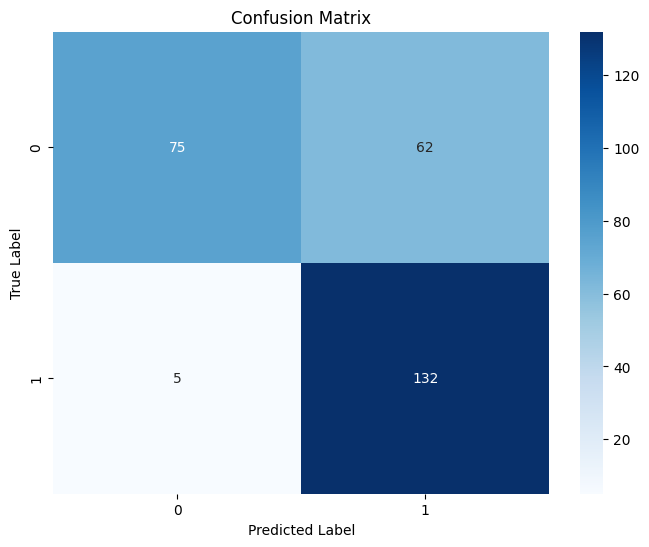

In [135]:
cm = metrics.confusion_matrix(y_val, y_pred2)

# 繪製熱力圖顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [139]:
y_pred = clf2.predict(x_test)

precision_2 = metrics.precision_score(y_test,y_pred)#,average='micro')
recall_2 = metrics.recall_score(y_test,y_pred)#,average='micro')
accuracy_2 = metrics.accuracy_score(y_test,y_pred)
f1_2 = metrics.f1_score(y_test,y_pred)#,average='micro')
print(accuracy_2)
print(precision_2)
print(recall_2)
print(f1_2)

0.77
0.6872586872586872
0.9417989417989417
0.7946428571428571


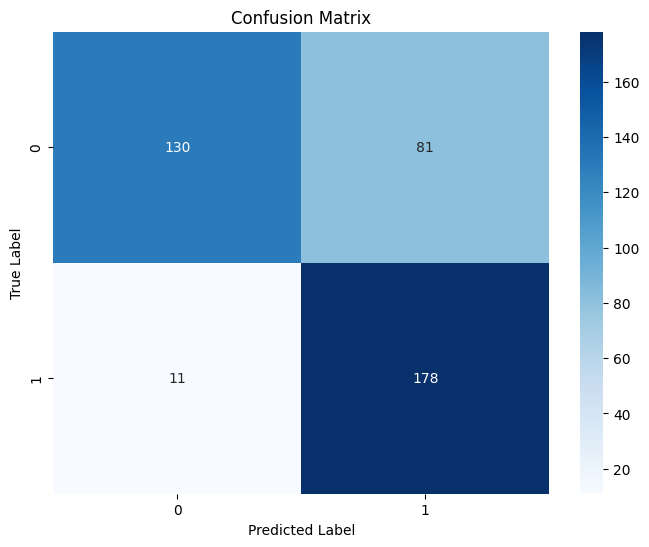

In [140]:
cm = metrics.confusion_matrix(y_test, y_pred)

# 繪製熱力圖顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [111]:
# cm2 = metrics.confusion_matrix(y_test, y_pred2)

# # 繪製熱力圖顯示混淆矩陣
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

## **Advance**

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
# 使用交叉驗證計算準確率
# cv_scores = cross_val_score(clf, x_train, y_train, cv=10)
cv_scores2 = cross_val_score(clf2, x_train, y_train, cv=10)

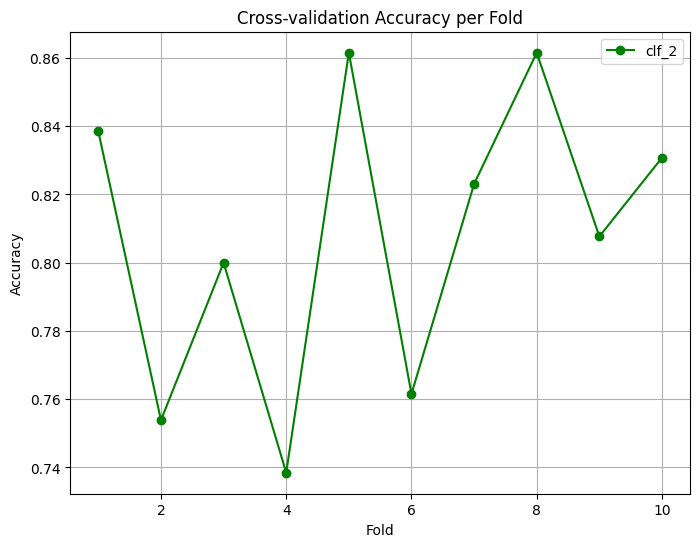

In [143]:
# 可視化交叉驗證結果
plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', color='b', label='clf_1')
plt.plot(range(1, 11), cv_scores2, marker='o', linestyle='-', color='g', label='clf_2')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy per Fold')
plt.legend()
plt.grid(True)
plt.show()
# print(cv_scores)

# Try something

In [79]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5,7,9],
    'min_samples_leaf': [1, 2,3,4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# 查看最佳參數
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [128]:
max_depth = grid_search.best_params_['max_depth']
min_samples_leaf = grid_search.best_params_['min_samples_leaf']
min_samples_split = grid_search.best_params_['min_samples_split']
print(max_depth,min_samples_leaf,min_samples_split)

8 2 2


In [129]:
train_accuracy = []
test_accuracy = []
train_f1 = []
test_f1 = []

for n_estimators in range(1, 100):
    clf = RandomForestClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,n_estimators=n_estimators,random_state=39)
    clf.fit(x_train, y_train)
    
    # 計算準確率
    train_accuracy.append(metrics.accuracy_score(y_train, clf.predict(x_train)))
    test_accuracy.append(metrics.accuracy_score(y_test, clf.predict(x_test)))
    train_f1.append(metrics.f1_score(y_test, clf.predict(x_test)))
    test_f1.append(metrics.f1_score(y_test, clf.predict(x_test)))


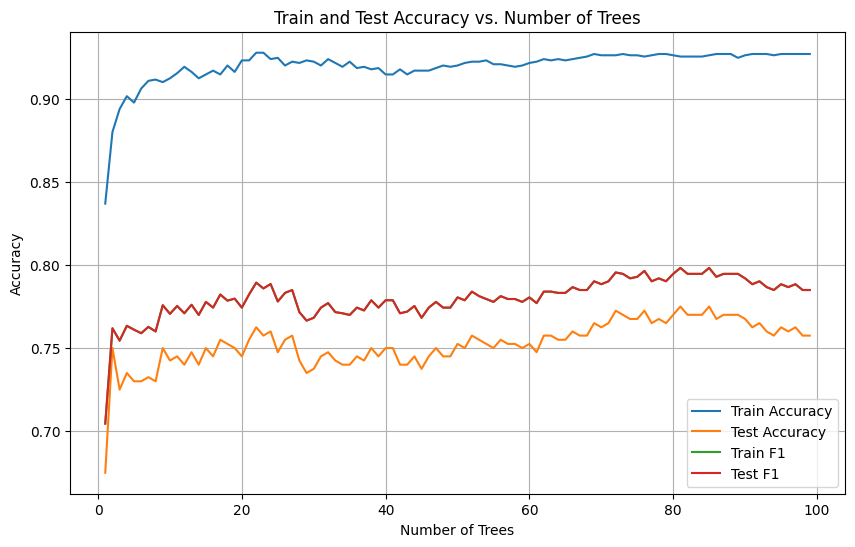

In [130]:
# 繪製準確率曲線
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), train_accuracy, label='Train Accuracy')
plt.plot(range(1, 100), test_accuracy, label='Test Accuracy')
plt.plot(range(1, 100), train_f1, label='Train F1')
plt.plot(range(1, 100), test_f1, label='Test F1')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
m = max(test_f1)
print(m)
for i in range(len(test_f1)):
    if test_f1[i]==m:
        print(i)

0.7982062780269058
80
84


In [89]:
# Assuming `model` is your trained Random Forest model (e.g., RandomForestClassifier or RandomForestRegressor)
feature_importance = clf2.feature_importances_

# Assuming you have a list of feature names
# For example: feature_names = ['feature_1', 'feature_2', ..., 'feature_n']
# feature_names = dataset.columns.tolist()
#train_features
feature_names = x_train.columns[:].tolist()
# print(feature_names)
# print(feature_names[-1])
# print(len(feature_importance))

# Combine feature names with their importance scores
feature_importance_dict = {feature_names[i]: feature_importance[i] for i in range(len(feature_names))}

# Sort the features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features
print("Sorted Feature Importance:")
for feature, score in sorted_features[:50]:  # Top 50 features
    print(f"{feature}: {score}")


Sorted Feature Importance:
light_curve__fft_coefficient__attr_"abs"__coeff_4: 0.021530196927083186
light_curve__fft_coefficient__attr_"real"__coeff_0: 0.0182453056153589
light_curve__ar_coefficient__coeff_2__k_10: 0.01638523907940792
light_curve__permutation_entropy__dimension_7__tau_1: 0.01536045434121509
light_curve__standard_deviation: 0.01530967628847677
light_curve__mean_n_absolute_max__number_of_maxima_7: 0.0118129703217533
light_curve__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"min": 0.011617154091843307
light_curve__change_quantiles__f_agg_"mean"__isabs_True__qh_0.4__ql_0.0: 0.01154755693773362
light_curve__ratio_beyond_r_sigma__r_3: 0.009466257066649325
light_curve__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min": 0.009360584066599035
light_curve__agg_linear_trend__attr_"rvalue"__chunk_len_10__f_agg_"mean": 0.00924316248187112
light_curve__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0: 0.008842242732407737
light_curve__change_quantiles_

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [91]:
dataset = pd.read_csv("data.csv")
dataset = dataset.sort_values(by=dataset.columns[0])
# dataset.index = dataset['Unnamed: 0']
dataset = dataset.drop(['Unnamed: 0'],axis=1)
df2 = pd.DataFrame(dataset.astype(float))
df2.fillna(0,inplace=True)
df2 = df2.replace([np.inf, -np.inf], np.nan).dropna()
# df2 = df2.drop(['Unnamed: 0'],axis=1)


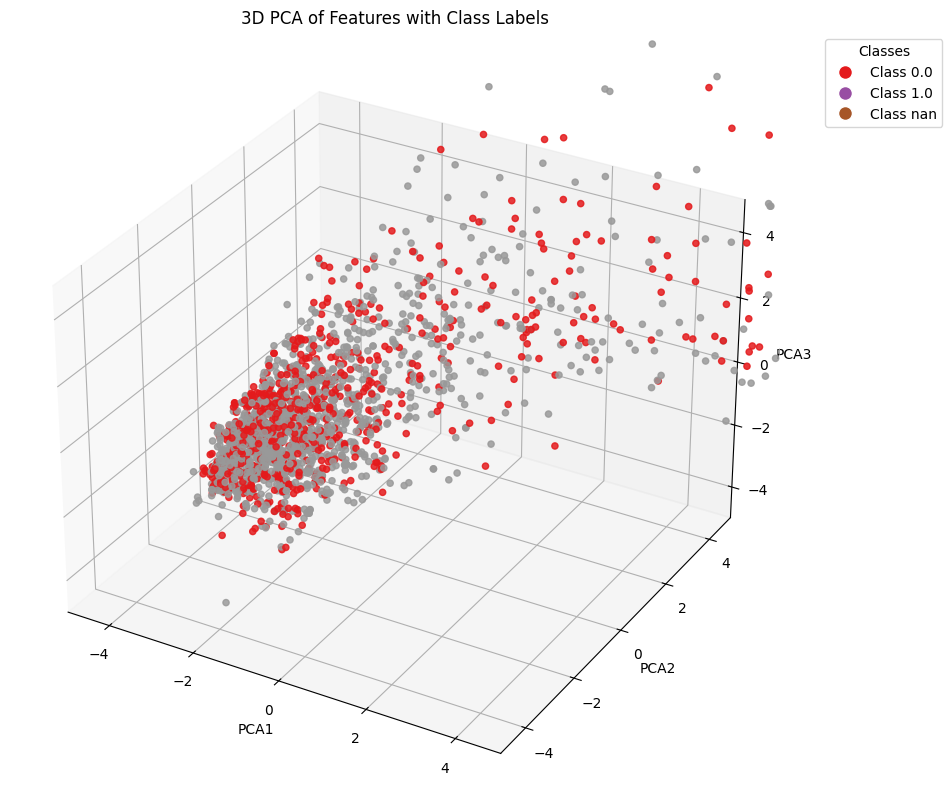

In [92]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop(columns='label'))  # 去掉标签列进行标准化

# PCA降维到3维
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  # 使用标准化后的数据进行PCA

# 将PCA结果与标签组合成一个新的DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['label'] = df2['label'].astype(int)  # 添加标签列

# 绘制3D散点图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 设置不同颜色和标签
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['label'], cmap='Set1', s=20)

# 设置标签
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Features with Class Labels')

# --- 放大视图部分 ---
# 可以设置显示的范围 (这里我们设置一个示例范围)
ax.set_xlim(-5, 5)  # X轴显示范围
ax.set_ylim(-5, 5)  # Y轴显示范围
ax.set_zlim(-5, 5)  # Z轴显示范围

# 添加颜色条
# fig.colorbar(scatter)

# 添加图例（可选）
# 你可以根据标签的数量来定制颜色条
unique_labels = df_pca['label'].unique()
# print(unique_labels)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(i / len(unique_labels)), markersize=10) for i in range(len(unique_labels))]
labels = [f'Class {label}' for label in unique_labels]
ax.legend(handles, labels, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.show()


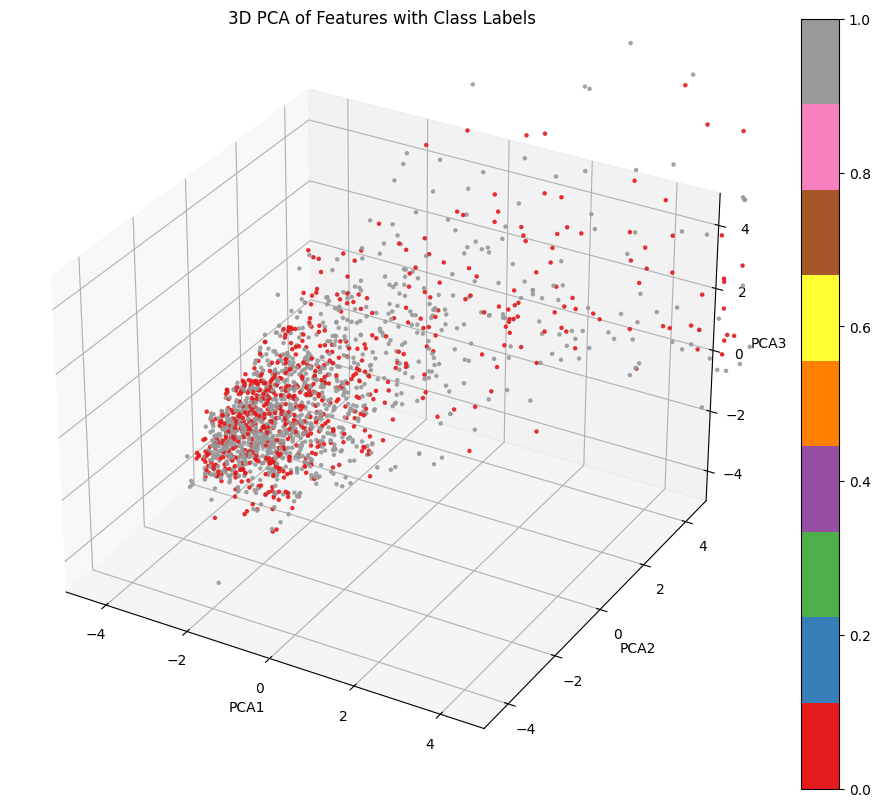

In [93]:
# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2.drop(columns='label'))  # 去掉標籤列進行標準化

# PCA降維到3維
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  # 使用標準化後的數據進行PCA

# 將PCA結果與標籤組合成一個新的DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['label'] = df2['label'].astype(int)  # 加入標籤列

# print(df_pca['label'])

# 確保標籤為數值型（如果不是的話）
# for i in df_pca['label']:
#     print(type(i), " : ",i)
# df_pca['label'] = df_pca['label'].astype(int)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 設置不同顏色和標籤
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['label'], cmap='Set1', s=5)

# 標註每個點的類別（只顯示一些標註，避免遮擋過多）
# for i in range(0, len(df_pca), int(len(df_pca)/10)):  # 每10個點標註一次
#     ax.text(df_pca['PCA1'].iloc[i], df_pca['PCA2'].iloc[i], df_pca['PCA3'].iloc[i], 
#             str(df_pca['label'].iloc[i]), size=10, color='black', zorder=5)

# 設置標籤
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Features with Class Labels')

# --- 放大視圖部分 ----
# 你可以設置顯示的範圍 (這裡我們設定一個示例範圍)
ax.set_xlim(-5, 5)  # X軸顯示範圍
ax.set_ylim(-5, 5)  # Y軸顯示範圍
ax.set_zlim(-5, 5)  # Z軸顯示範圍
# 顯示顏色條
fig.colorbar(scatter)

# 顯示圖表
plt.show()